## 1. Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

## 2. Reading the Training Data

In [3]:
file_path = r"/Users/subhadeepchoudhury/Desktop/flight-price-prediction/data/train.csv"

train = pd.read_csv(file_path)

train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,11:40:00,14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,10:45:00,18:50:00,1925,2.0,No Info,11093
6691,Air India,2019-05-01,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8891
6692,Jet Airways,2019-06-01,Delhi,Cochin,14:00:00,19:00:00,300,1.0,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,07:55:00,13:25:00,330,1.0,No Info,6152


In [4]:
train.dtypes 

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [5]:
train = train.assign(**{
    col : pd.to_datetime(train.loc[:,col], dayfirst = True)
    for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

/var/folders/z3/30b2lqcn3vx2zfmwz2111d4w0000gn/T/ipykernel_54749/1896268163.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  col : pd.to_datetime(train.loc[:,col], dayfirst = True)
/var/folders/z3/30b2lqcn3vx2zfmwz2111d4w0000gn/T/ipykernel_54749/1896268163.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col : pd.to_datetime(train.loc[:,col], dayfirst = True)
/var/folders/z3/30b2lqcn3vx2zfmwz2111d4w0000gn/T/ipykernel_54749/1896268163.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col : pd.to_datetime(train.loc[:,col], dayfirst = True)


airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

## 3. High level Summary of the Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   dep_time         6695 non-null   datetime64[ns]
 5   arrival_time     6695 non-null   datetime64[ns]
 6   duration         6695 non-null   int64         
 7   total_stops      6694 non-null   float64       
 8   additional_info  6695 non-null   object        
 9   price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.2+ KB


In [7]:
train.describe(include="number")

,duration,total_stops,price
count,6695.000000,6694.000000,6695.000000
mean,633.489171,0.801464,9030.965646
std,503.006311,0.659737,4639.522857
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5224.000000
50%,510.000000,1.000000,8283.000000
75%,922.500000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [8]:

(
    train
    .assign(total_stops=train.total_stops.astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,6695,6695,6695,6694.0,6695
unique,9,5,6,4.0,7
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2391,2730,2730,3580.0,5249


## 4. High-level analysis of Missing Values

In [9]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
total_stops,1,0.014937


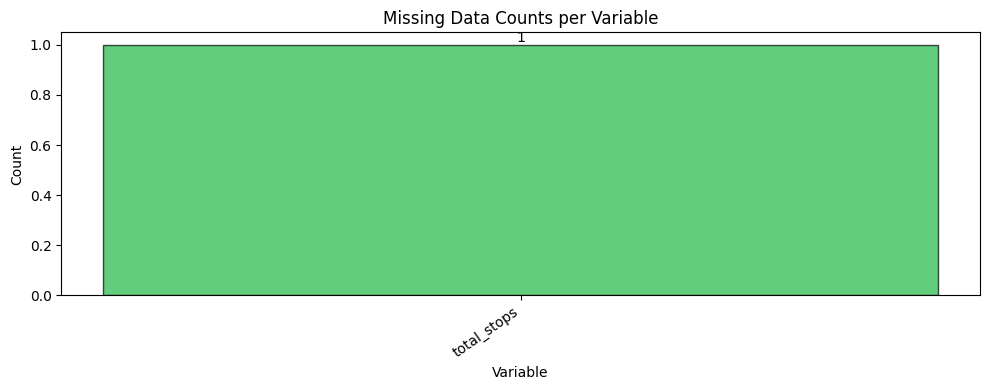

In [10]:
eda_helper_functions.plot_missing_info(train)

In [11]:
train.dropna(inplace = True)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6694 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6694 non-null   object        
 1   date_of_journey  6694 non-null   datetime64[ns]
 2   source           6694 non-null   object        
 3   destination      6694 non-null   object        
 4   dep_time         6694 non-null   datetime64[ns]
 5   arrival_time     6694 non-null   datetime64[ns]
 6   duration         6694 non-null   int64         
 7   total_stops      6694 non-null   float64       
 8   additional_info  6694 non-null   object        
 9   price            6694 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 575.3+ KB


## 5. High-level analysis of outliers

In [13]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [14]:
(
    train
    .assign(outlier = forest.fit_predict(train
                                         .drop(columns = 'price')
                                         .select_dtypes(include= "number")))
    .query("outlier == -1")
    .duration
    .describe()
)

count    2824.000000
mean      871.683782
std       638.864664
min        75.000000
25%       150.000000
50%      1025.000000
75%      1425.000000
max      2860.000000
Name: duration, dtype: float64

In [15]:
(
    train
    .assign(outlier = forest.fit_predict(train
                                         .drop(columns = 'price')
                                         .select_dtypes(include= "number")))
    .query("outlier == -1")
    .total_stops
    .describe()
)

count    2824.000000
mean        0.979462
std         0.821429
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: total_stops, dtype: float64

## 6. Pair Plots

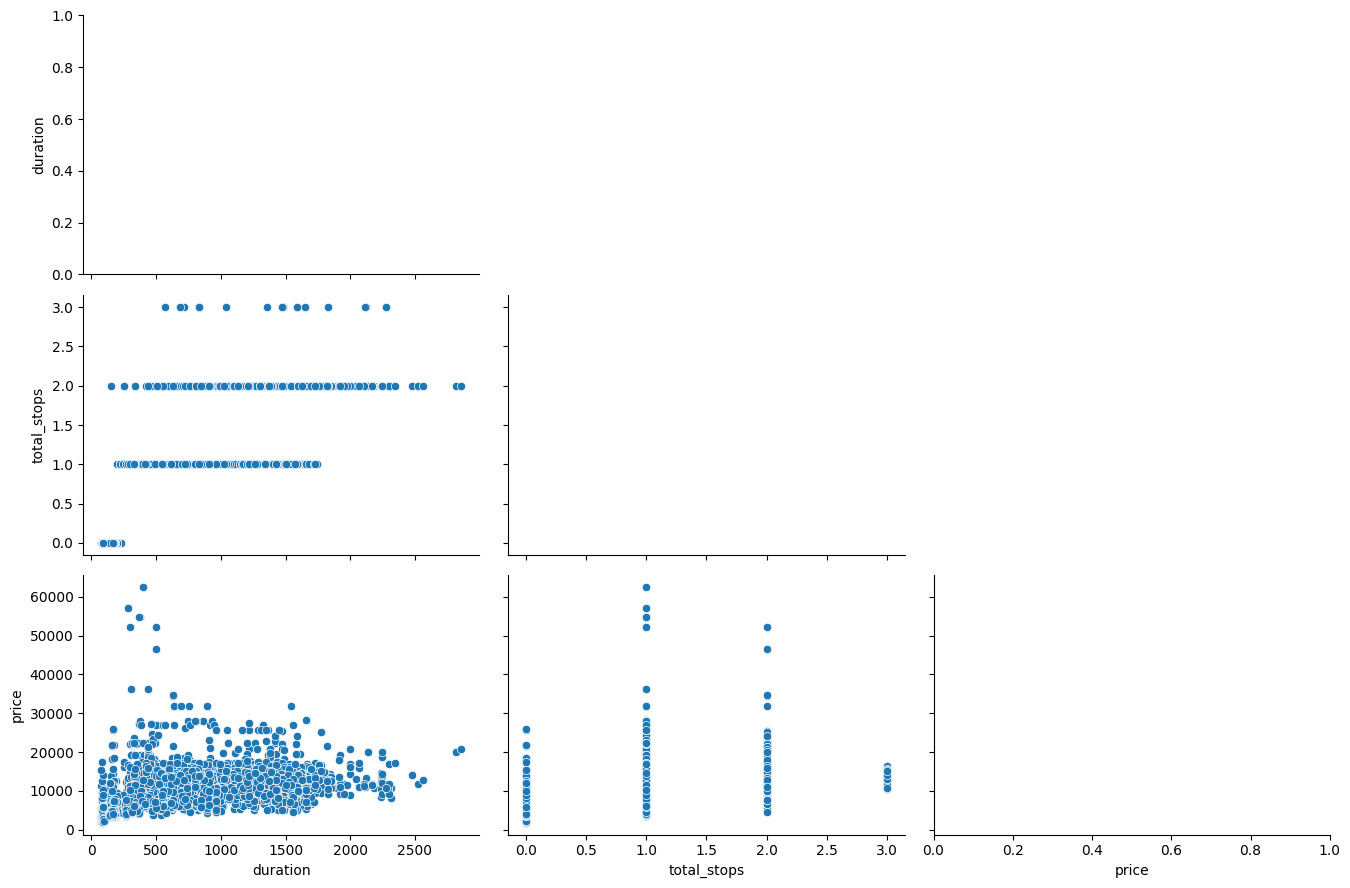

In [16]:
eda_helper_functions.pair_plots(train)

## 7.Correlation Analysis

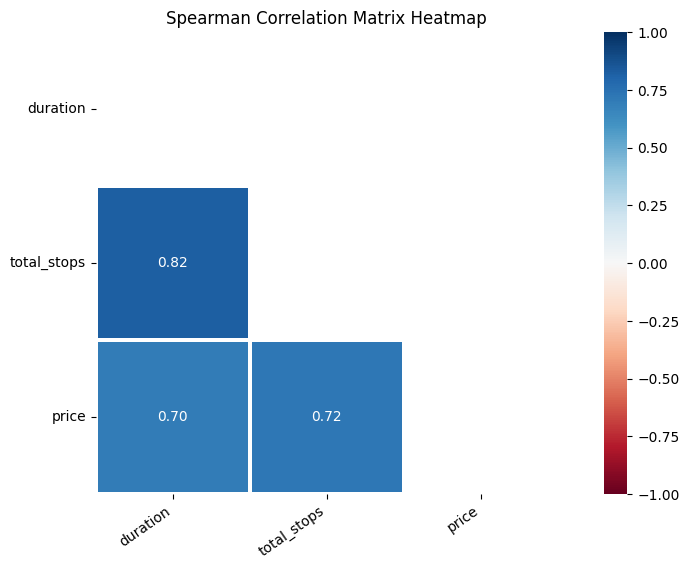

In [17]:
eda_helper_functions.correlation_heatmap(train)

In [18]:
cm = train.corr(method="spearman", numeric_only= True)

In [19]:
print(np.zeros_like(cm))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


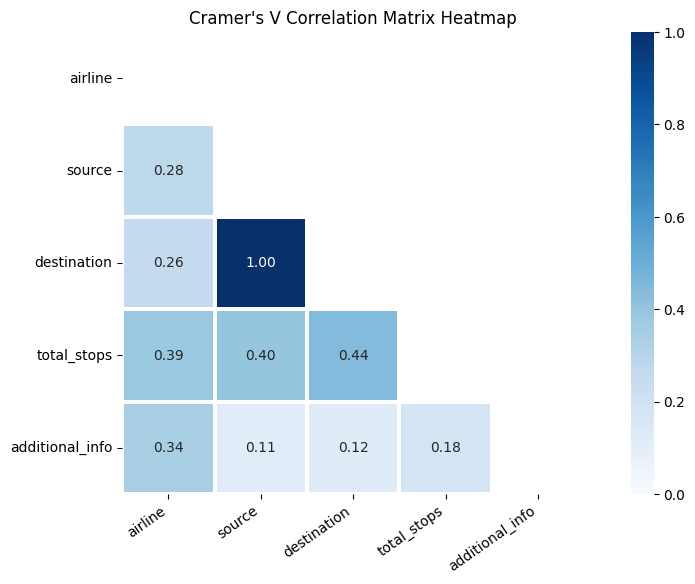

In [20]:
eda_helper_functions.cramersV_heatmap(
    train
    .assign(total_stops = train.total_stops.astype("O"))
    )

## 8. Detailed Analysis

In [21]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 airline

In [22]:
train.airline

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6694, dtype: object

In [23]:
eda_helper_functions.cat_summary(train, "airline")

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,9
top,Jet Airways
freq,2391


,count,percentage
category,,
Jet Airways,2391,0.357186
Indigo,1296,0.193606
Air India,1075,0.160592
Multiple Carriers,736,0.109949
Spicejet,537,0.080221
Vistara,322,0.048103
Air Asia,211,0.031521
Goair,125,0.018673
Trujet,1,0.000149


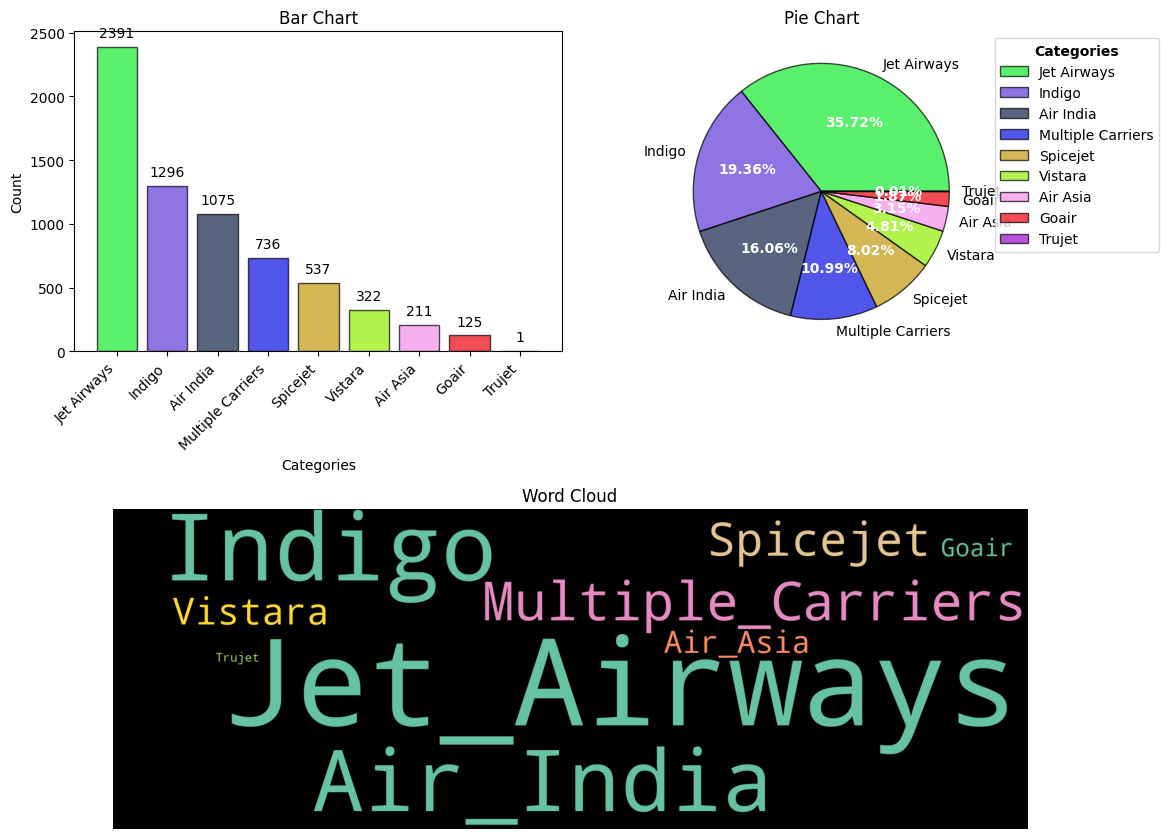

In [24]:
eda_helper_functions.cat_univar_plots(train, "airline")

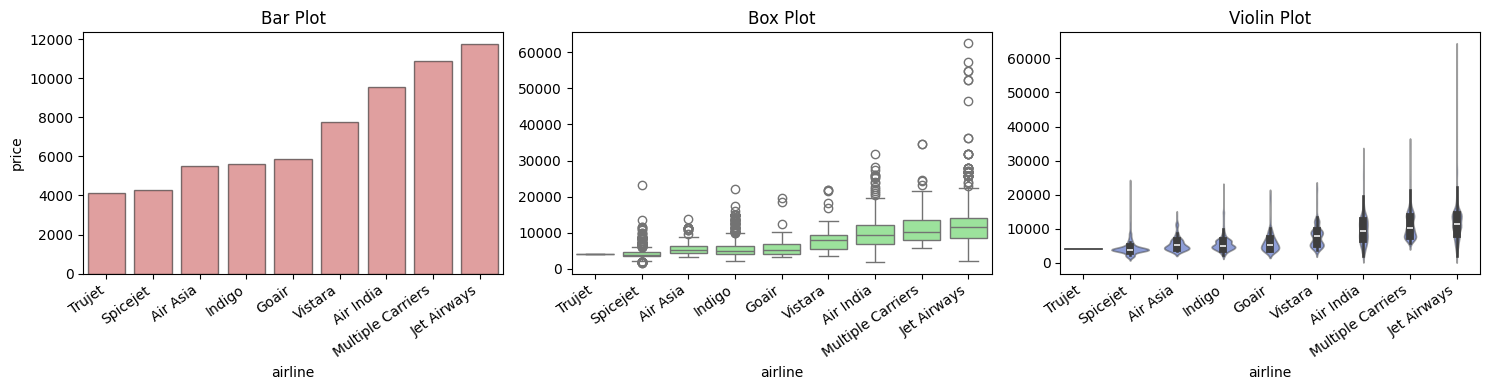

In [25]:
eda_helper_functions.num_cat_bivar_plots(
    data = train,
    num_var = "price",
    cat_var = "airline"
)

In [26]:
eda_helper_functions.num_cat_hyp_testing(train,"price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 473.2504388077414
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3130.947388921903
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


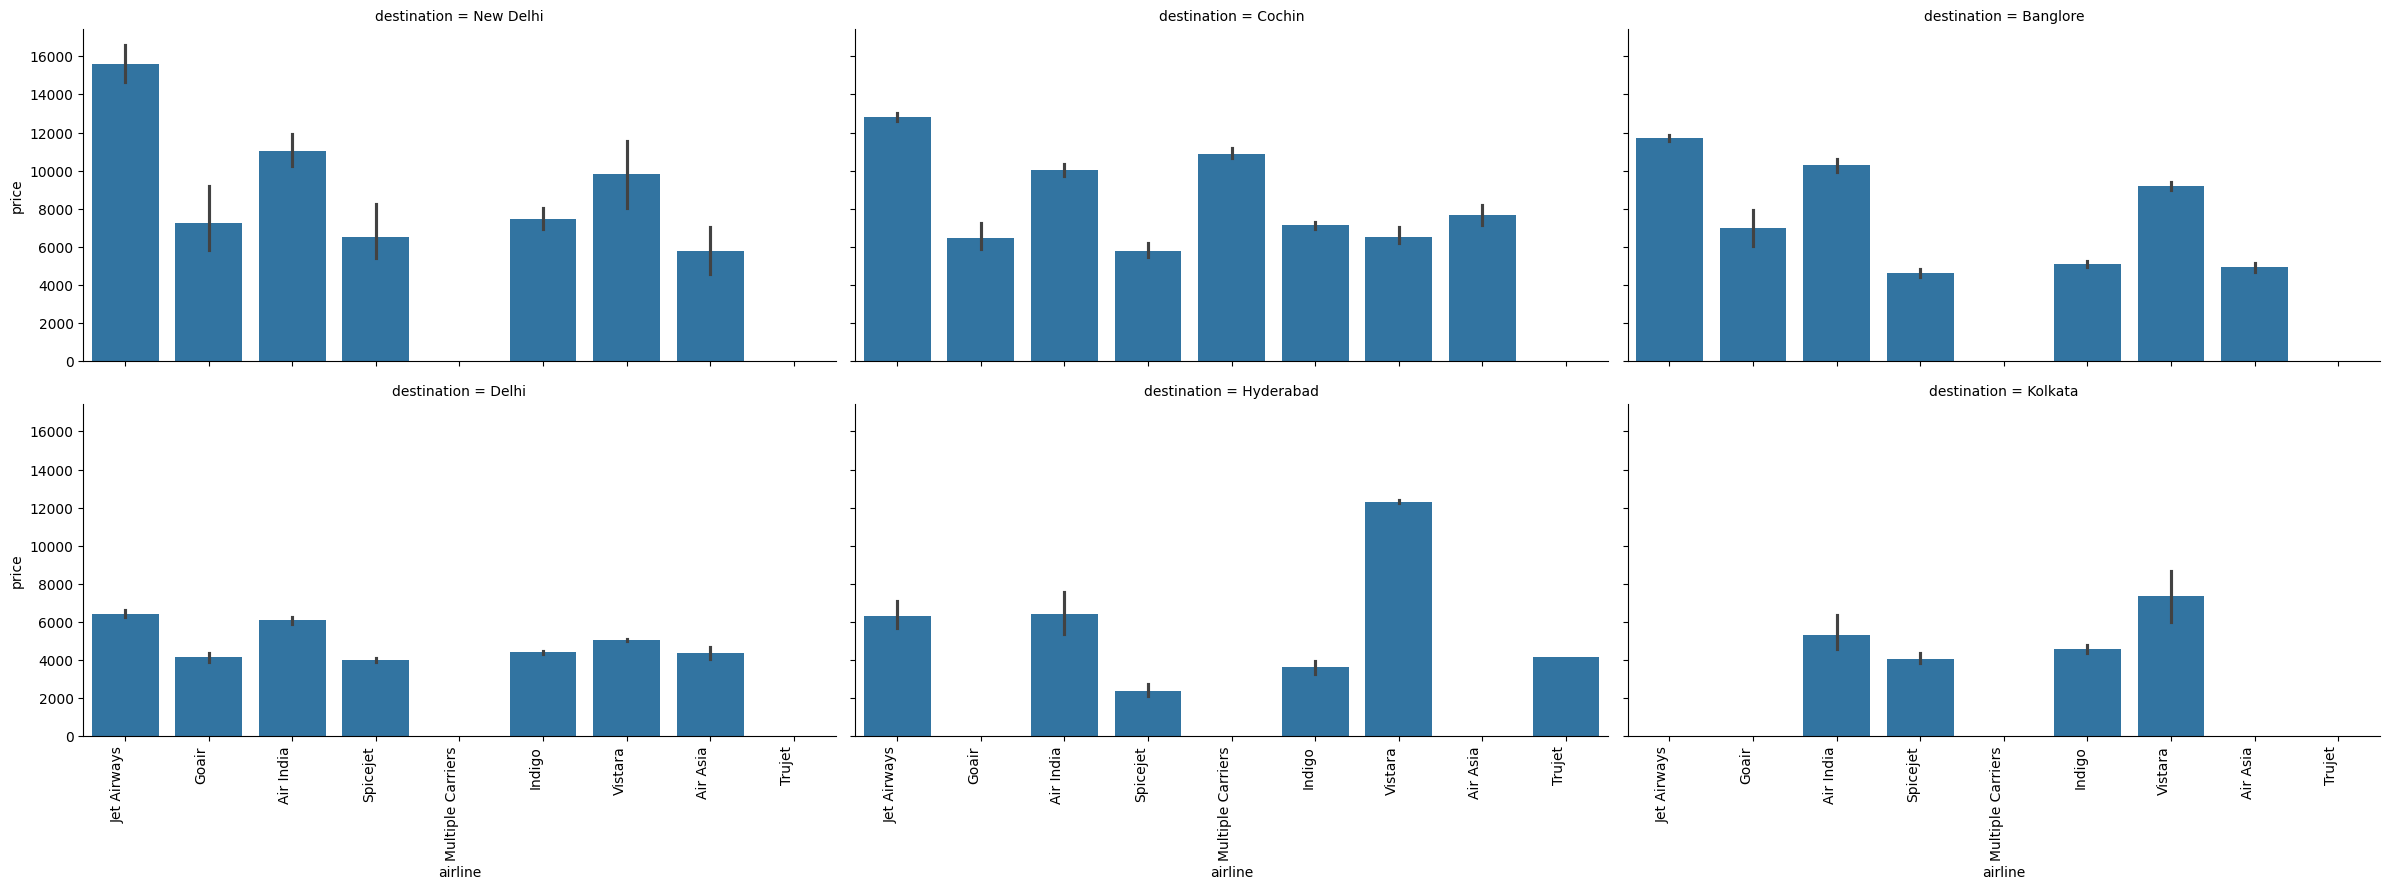

In [27]:
airline_grid = sns.FacetGrid(
    train, 
    col = "destination",
    col_wrap = 3,
    height = 4,
    aspect = 2,
    sharey = True
)

airline_grid.map(sns.barplot, "airline", "price", order = train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax, angle = 90)

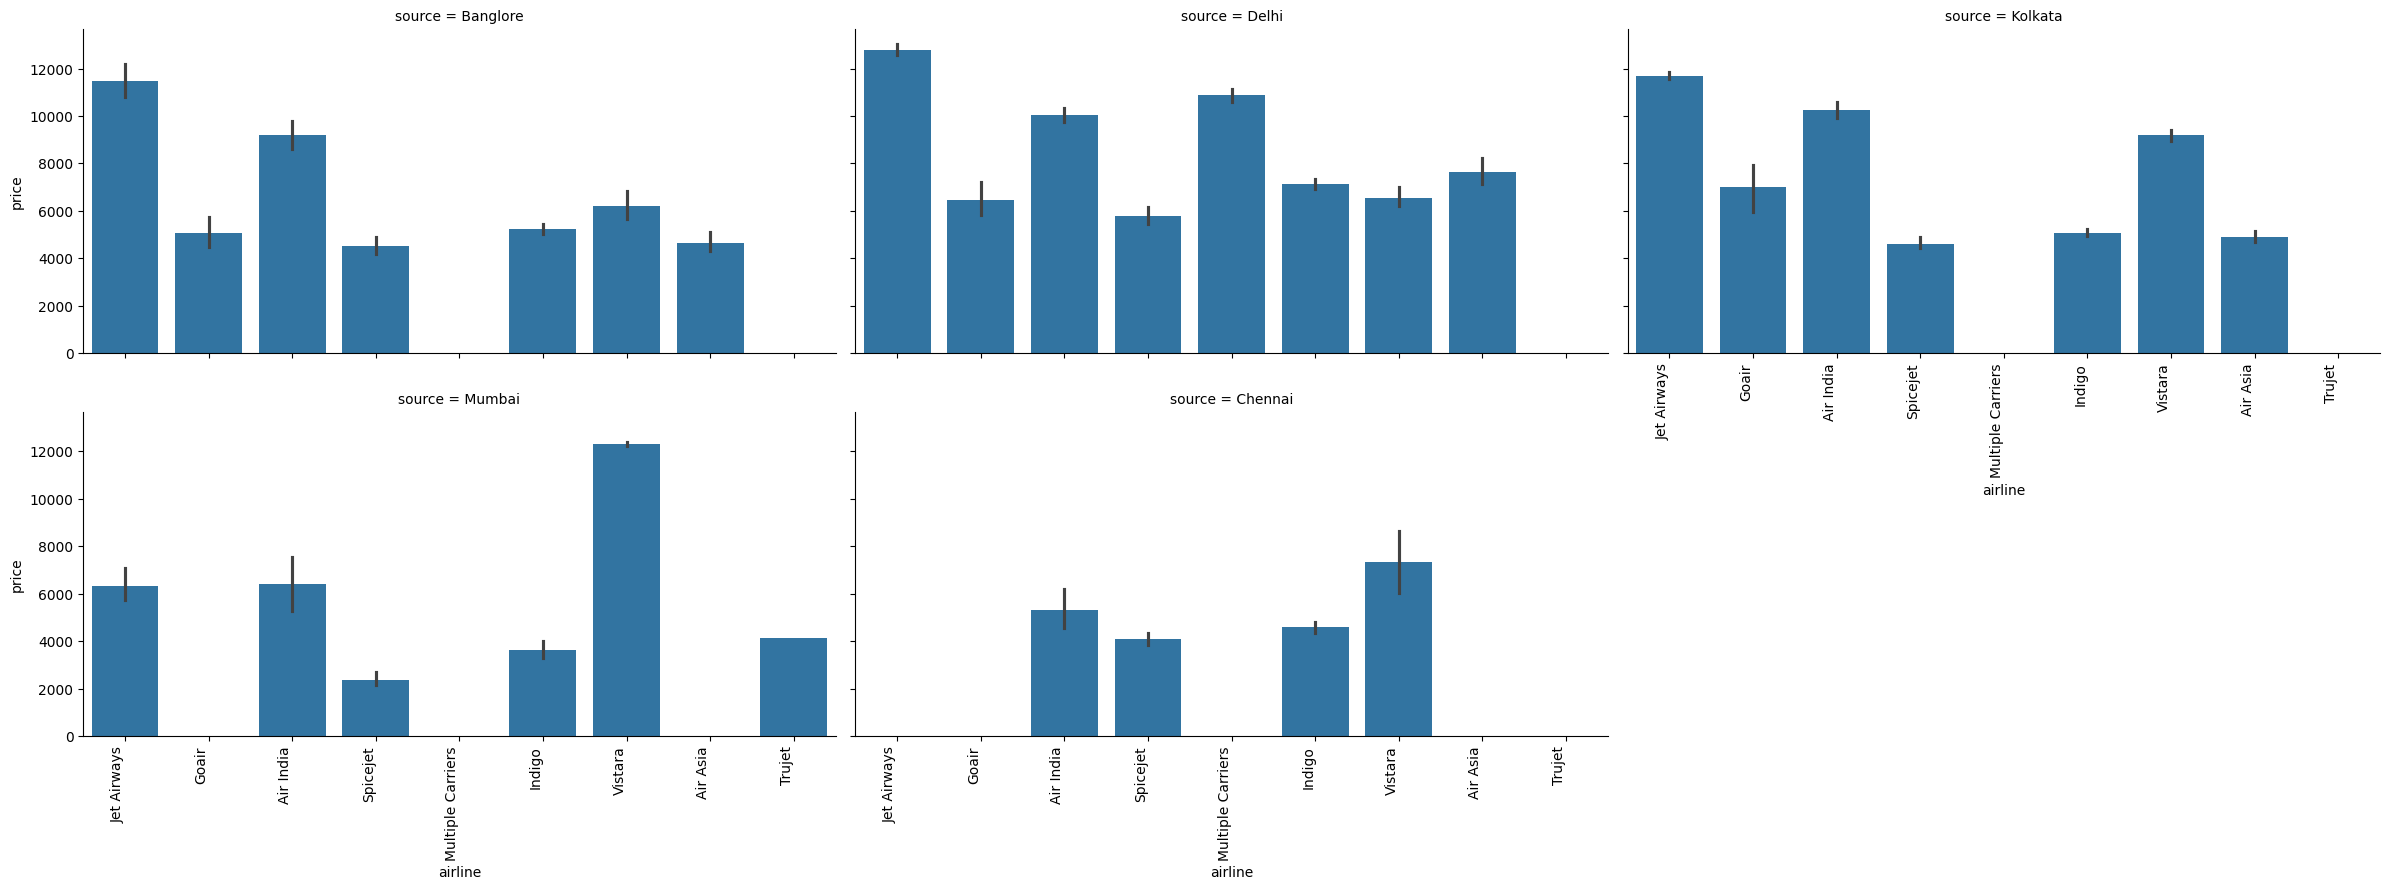

In [28]:
airline_grid = sns.FacetGrid(
    train, 
    col = "source",
    col_wrap = 3,
    height = 4,
    aspect = 2,
    sharey = True
)

airline_grid.map(sns.barplot, "airline", "price", order = train.airline.unique())

for ax in airline_grid.axes[2:]:
    eda_helper_functions.rotate_xlabels(ax, angle = 90)

### 8.2 date_of_journey

In [29]:
train.date_of_journey

0      2019-03-21
1      2019-03-27
2      2019-03-09
3      2019-06-12
4      2019-03-12
          ...    
6690   2019-03-21
6691   2019-05-01
6692   2019-06-01
6693   2019-06-24
6694   2019-03-01
Name: date_of_journey, Length: 6694, dtype: datetime64[ns]

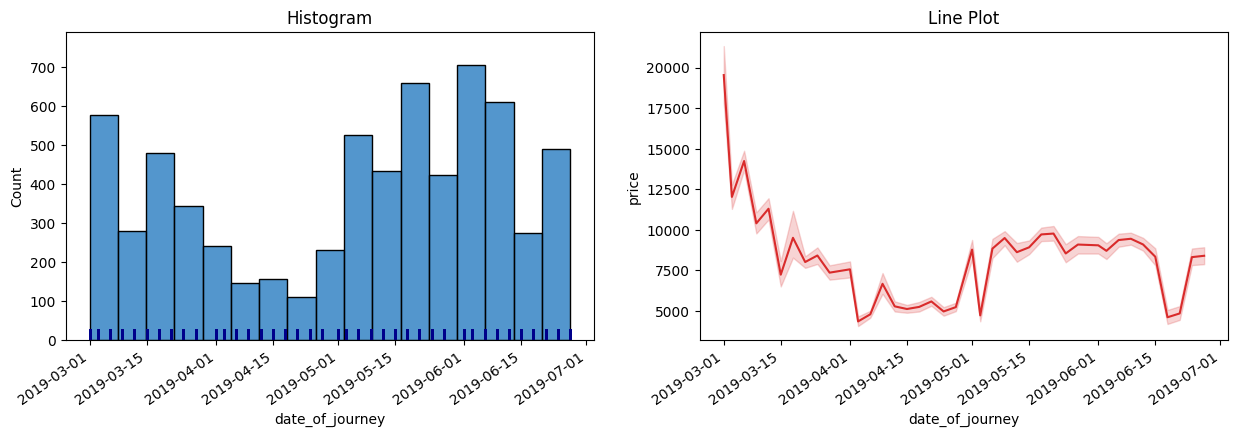

In [30]:
eda_helper_functions.dt_univar_plots(
    train,
    "date_of_journey",
    "price"
)

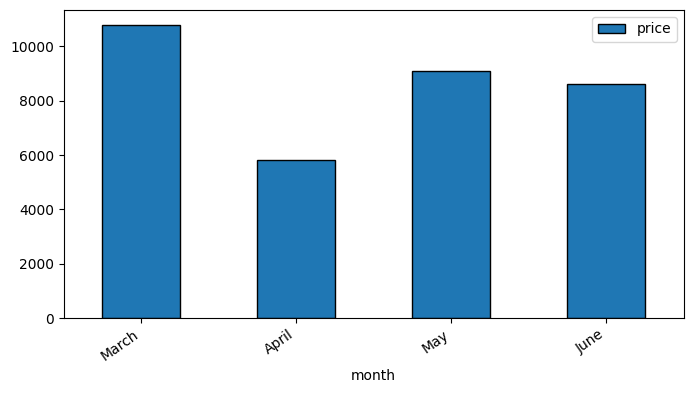

In [31]:
(   
    train
    .groupby(pd.Grouper(key = "date_of_journey", freq = "M"))
    .price.mean()
    .to_frame()
    .set_axis(['March', "April", "May", "June"], axis = 0)
    .rename_axis(index = "month")
    .plot(
        kind = "bar",
        figsize = (8,4),
        edgecolor = "black"
        )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

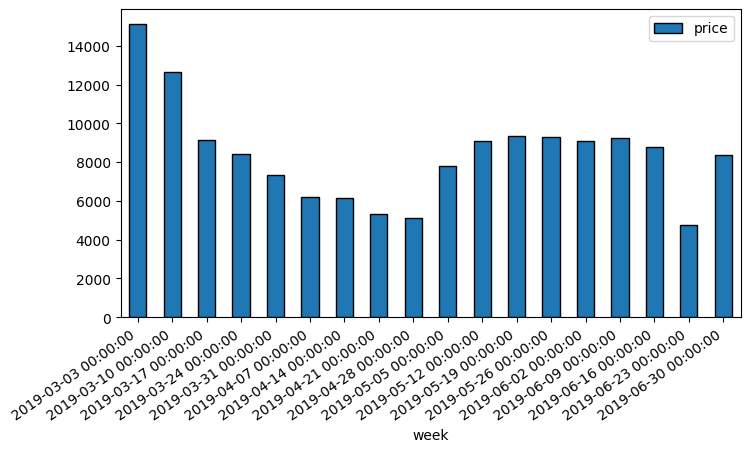

In [32]:
(   
    train
    .groupby(pd.Grouper(key = "date_of_journey", freq = "W"))
    .price.mean()
    .to_frame()
    # .set_axis(['March', "April", "May", "June"], axis = 0)
    .rename_axis(index = "week")
    .plot(
        kind = "bar",
        figsize = (8,4),
        edgecolor = "black"
        )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

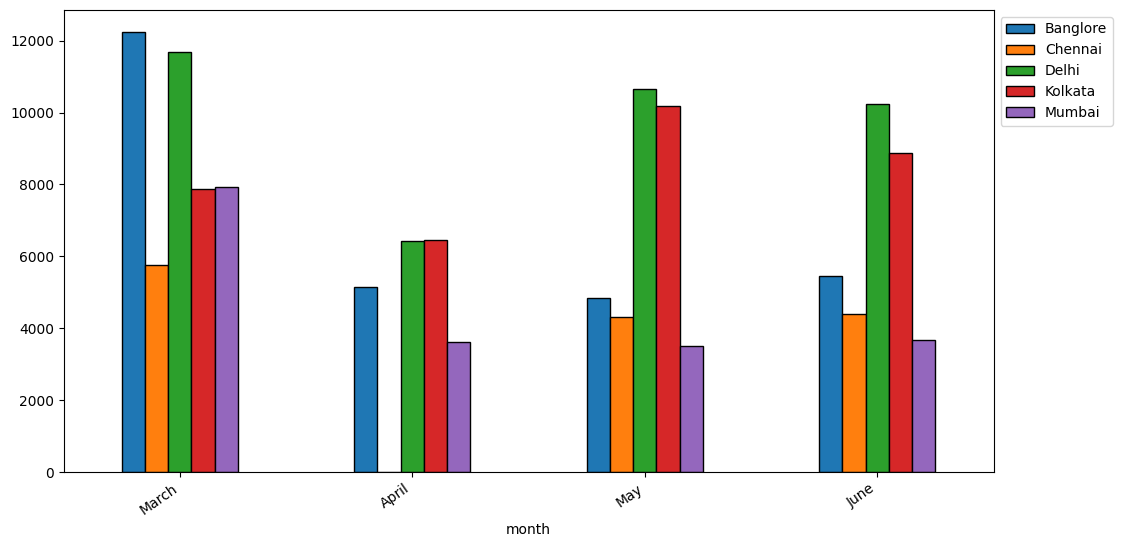

In [33]:
(
    train
    .groupby([pd.Grouper(key = "date_of_journey", freq = "M"), "source"])
    .price.mean()
    .unstack(fill_value = 0)
    .set_axis(['March', "April", "May", "June"], axis = 0)
    .rename_axis(index = "month")
    .plot(
        kind = "bar",
        figsize = (12,6),
        edgecolor = "black"
        )
)

ax = plt.gca()
ax.legend(
    loc = "upper left",
    bbox_to_anchor = (1,1)
)
eda_helper_functions.rotate_xlabels(ax)

### 8.3 dep_time

In [34]:
train.dep_time

0      2025-03-30 08:55:00
1      2025-03-30 17:30:00
2      2025-03-30 11:40:00
3      2025-03-30 09:25:00
4      2025-03-30 22:55:00
               ...        
6690   2025-03-30 10:45:00
6691   2025-03-30 09:25:00
6692   2025-03-30 14:00:00
6693   2025-03-30 07:55:00
6694   2025-03-30 11:50:00
Name: dep_time, Length: 6694, dtype: datetime64[ns]

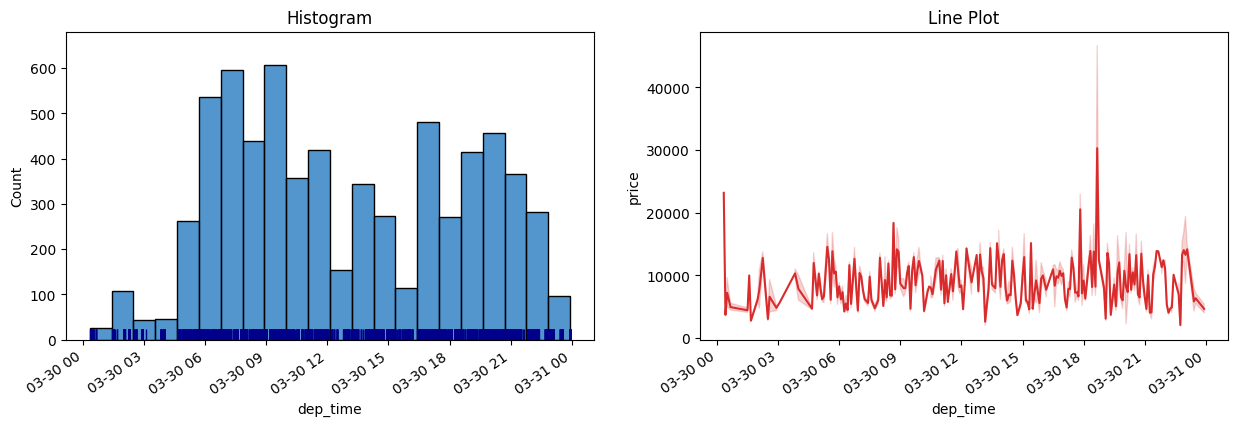

In [35]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

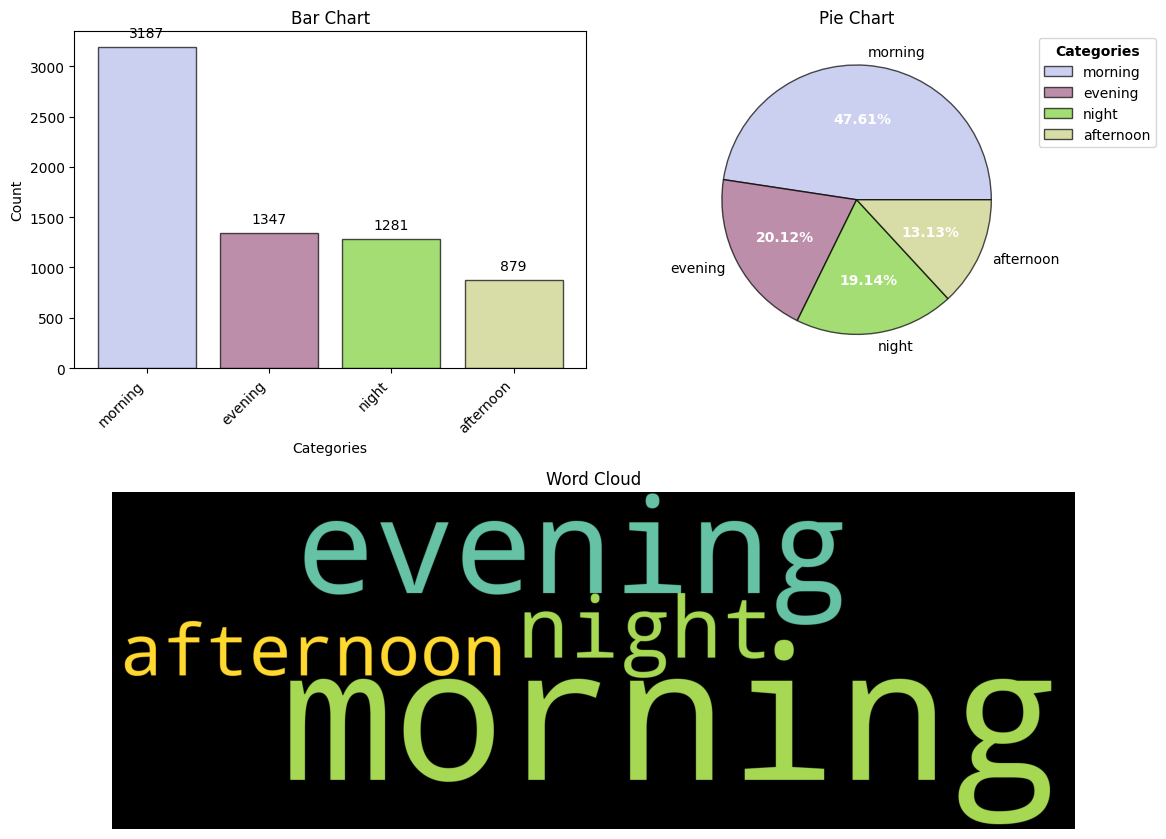

In [36]:
(
    train
    .assign(
        dep_time = lambda df_ :(
            np.select([df_.dep_time.dt.hour.between(4,12, inclusive="left"),
                       df_.dep_time.dt.hour.between(12,16, inclusive = "left"),
                       df_.dep_time.dt.hour.between(16, 20, inclusive = "left")],
                       ["morning","afternoon", "evening"],
                       default = "night")
        )
    )
    .pipe(eda_helper_functions.cat_univar_plots, "dep_time")
)

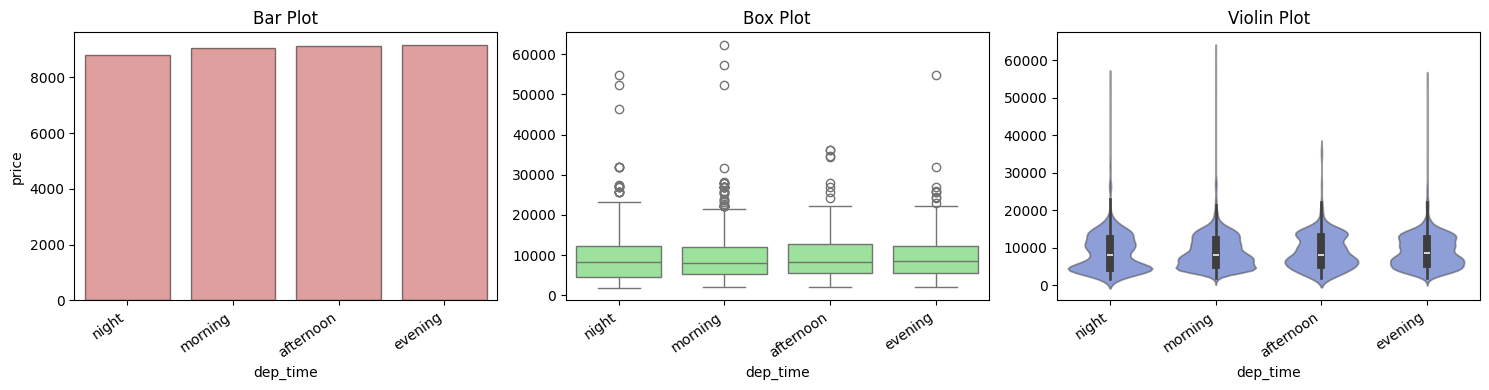

In [37]:
(
    train
    .assign(
        dep_time = lambda df_ :(
            np.select([df_.dep_time.dt.hour.between(4,12, inclusive="left"),
                       df_.dep_time.dt.hour.between(12,16, inclusive = "left"),
                       df_.dep_time.dt.hour.between(16, 20, inclusive = "left")],
                       ["morning","afternoon", "evening"],
                       default = "night")
        )
    )
    .pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

### 8.4 duration

In [38]:
train.duration

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6694, dtype: int64

In [39]:
eda_helper_functions.num_summary(train, "duration")

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6694, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,510.00
75,920.00
90,1440.00
95,1601.75
99,1855.00


,value
mean,633.371676
trimmed mean (5%),599.575174
trimmed mean (10%),570.895258
median,510.000000


,value
var,252960.712875
std,502.951999
IQR,750.000000
mad,340.000000
coef_variance,0.794087


,value
skewness,0.894131
kurtosis,-0.052204


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 7.367044778597017e-57
Test Statistic       : 0.886539636636061
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 248.45769626661695
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


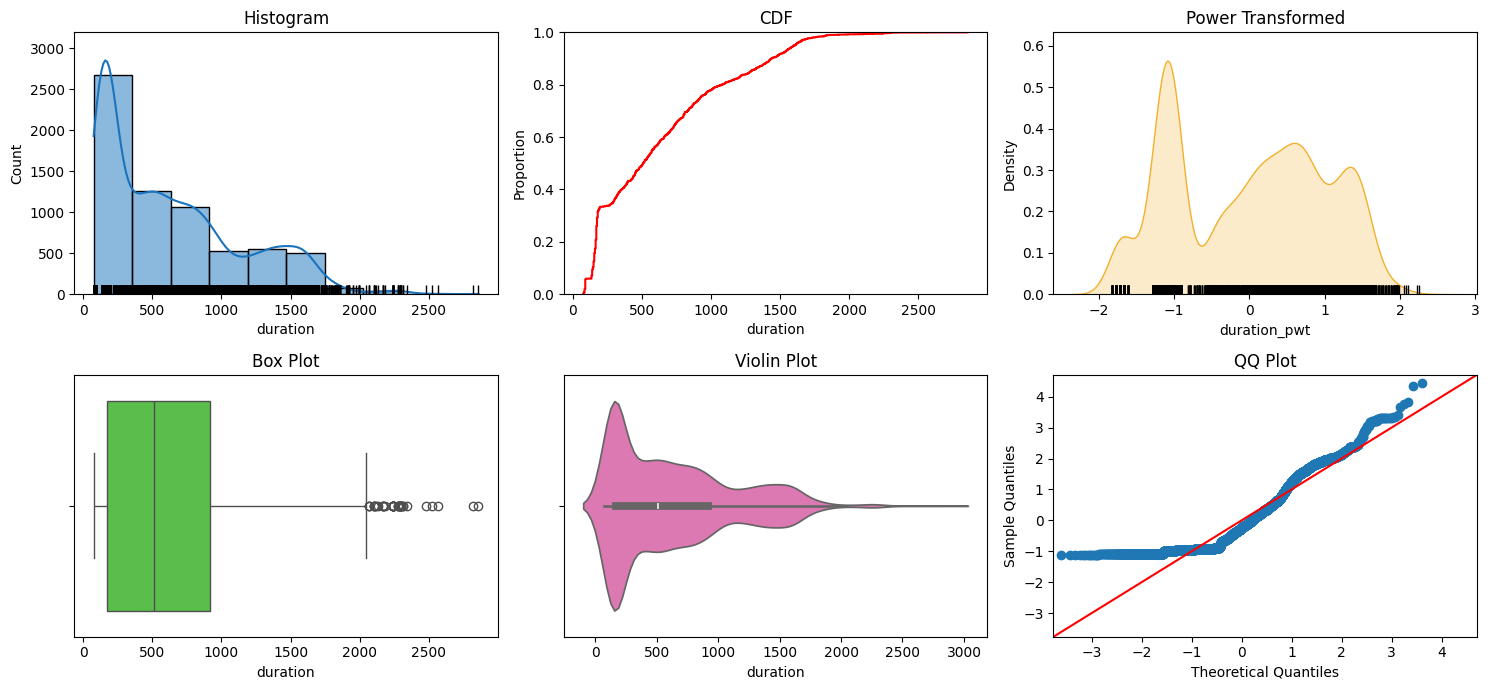

In [40]:
eda_helper_functions.num_univar_plots(train, "duration")

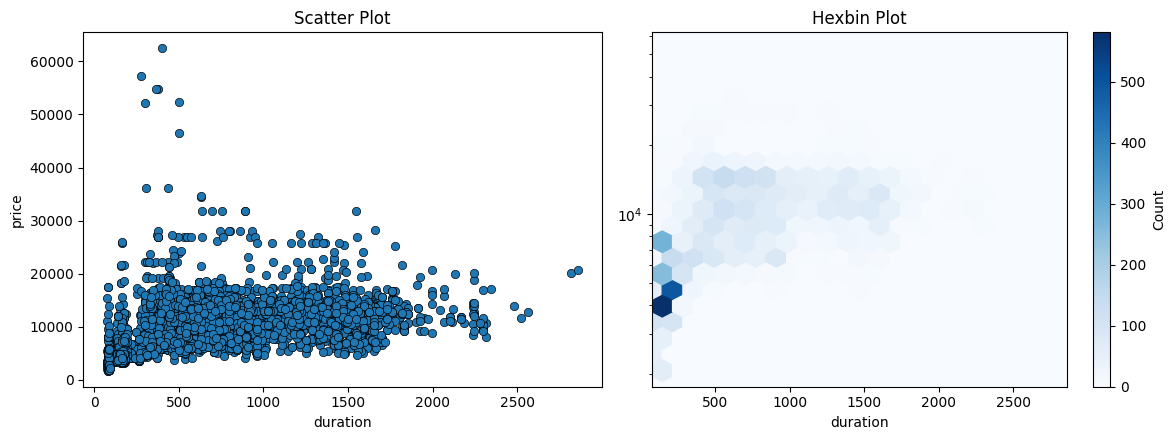

In [41]:
eda_helper_functions.num_bivar_plots(
    train,
    "duration",
    "price",
    hexbin_kwargs= dict(
        yscale = "log",
        gridsize = 20,
        cmap = "Blues"
    )
)

In [42]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration" )

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5091878071906606
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6980000420004595
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


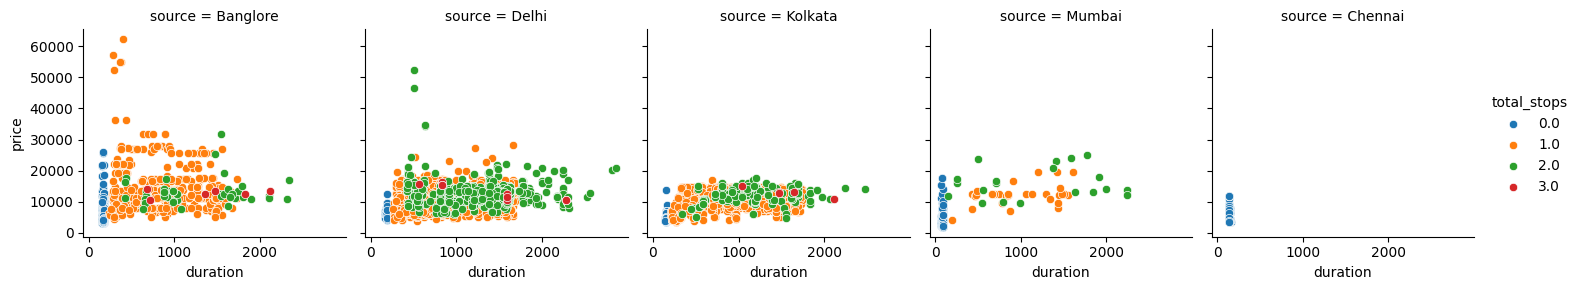

In [43]:
duration_grid = sns.FacetGrid(
    data = train,
    col = "source",
    hue = "total_stops",
    sharey = True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [68]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -955.0
Upper Limit : 2045.0


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
3690,Air India,2019-05-01,Kolkata,Banglore,2025-03-30 05:50:00,2025-03-30 16:15:00,2065,2.0,No Info,10991
6079,Jet Airways,2019-03-06,Delhi,Cochin,2025-03-30 17:55:00,2025-03-30 04:25:00,2070,2.0,No Info,17072
3225,Jet Airways,2019-03-06,Delhi,Cochin,2025-03-30 17:55:00,2025-03-30 04:25:00,2070,2.0,In-flight meal not included,15812
2990,Air India,2019-03-03,Banglore,New Delhi,2025-03-30 11:05:00,2025-03-30 22:10:00,2105,2.0,No Info,11791
4589,Air India,2019-03-18,Banglore,New Delhi,2025-03-30 11:05:00,2025-03-30 22:10:00,2105,2.0,No Info,11161
1517,Air India,2019-03-03,Banglore,New Delhi,2025-03-30 11:05:00,2025-03-30 22:10:00,2105,2.0,No Info,11948
2916,Air India,2019-05-12,Kolkata,Banglore,2025-03-30 12:00:00,2025-03-30 23:15:00,2115,3.0,No Info,10991
2170,Air India,2019-03-12,Banglore,New Delhi,2025-03-30 06:45:00,2025-03-30 18:05:00,2120,3.0,No Info,13387
1105,Jet Airways,2019-03-06,Delhi,Cochin,2025-03-30 16:50:00,2025-03-30 04:25:00,2135,2.0,No Info,19907
4000,Air India,2019-03-06,Delhi,Cochin,2025-03-30 07:05:00,2025-03-30 19:15:00,2170,2.0,No Info,11552


### 8.5 total_stops

In [44]:
train.total_stops

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
6690    2.0
6691    1.0
6692    1.0
6693    1.0
6694    1.0
Name: total_stops, Length: 6694, dtype: float64

In [45]:
eda_helper_functions.num_summary(train, "total_stops")

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
6690    2.0
6691    1.0
6692    1.0
6693    1.0
6694    1.0
Name: total_stops, Length: 6694, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,value
percentile,
0,0.0
5,0.0
10,0.0
25,0.0
50,1.0
75,1.0
90,2.0
95,2.0
99,2.0


,value
mean,0.801464
trimmed mean (5%),0.775971
trimmed mean (10%),0.747946
median,1.000000


,value
var,0.435253
std,0.659737
IQR,1.000000
mad,0.000000
coef_variance,0.823165


,value
skewness,0.304204
kurtosis,-0.480224


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.321556554189948e-68
Test Statistic       : 0.7909216189870736
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 645.2434000248013
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


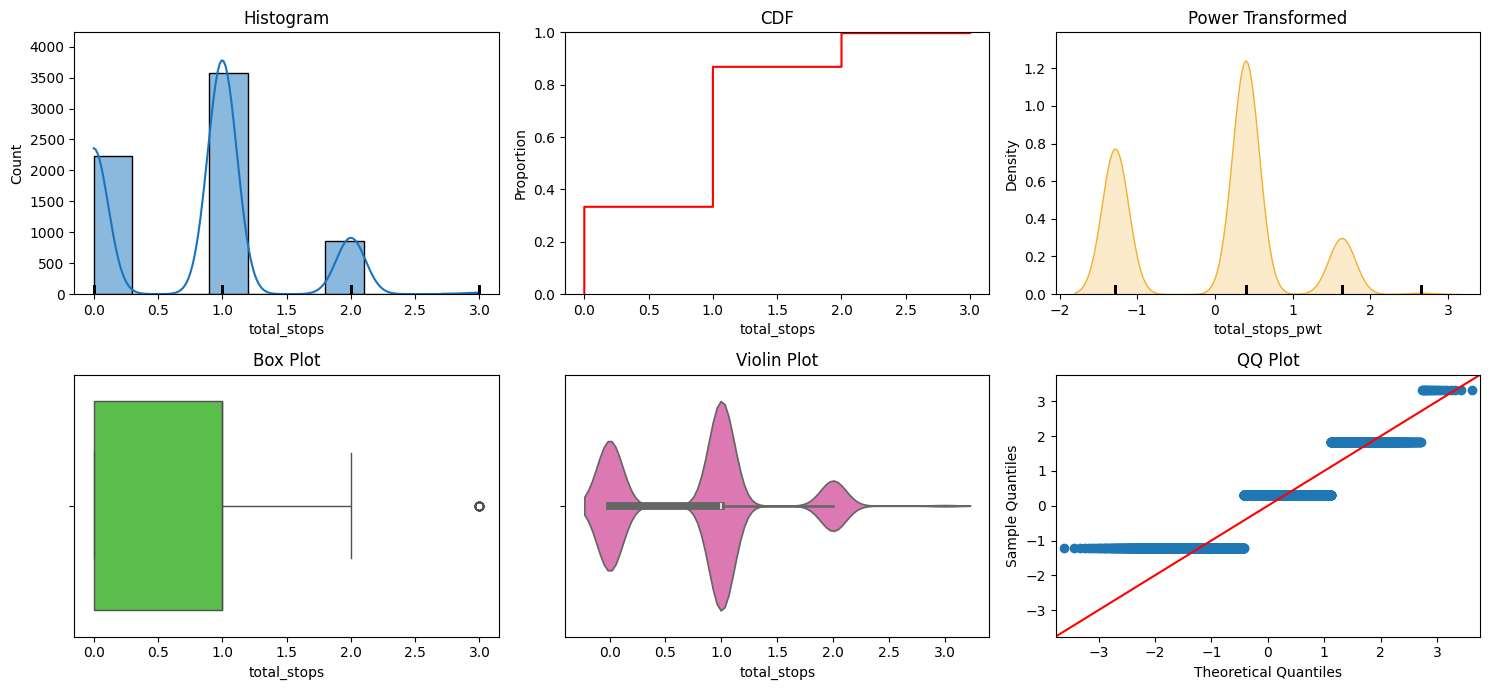

In [46]:
eda_helper_functions.num_univar_plots(train, "total_stops")

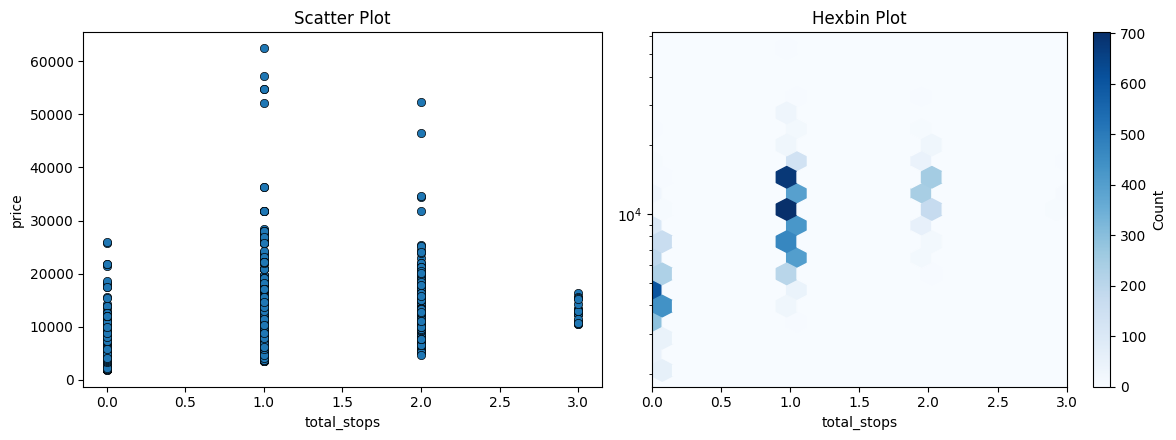

In [48]:
eda_helper_functions.num_bivar_plots(
    train,
    "total_stops",
    "price",
    hexbin_kwargs= dict(
        yscale = "log",
        gridsize = 20,
        cmap = "Blues"
    )
)

In [49]:
eda_helper_functions.num_num_hyp_testing(train, "price", "total_stops")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6067006868428995
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and total_stops are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7210342577905885
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and total_stops are correlated


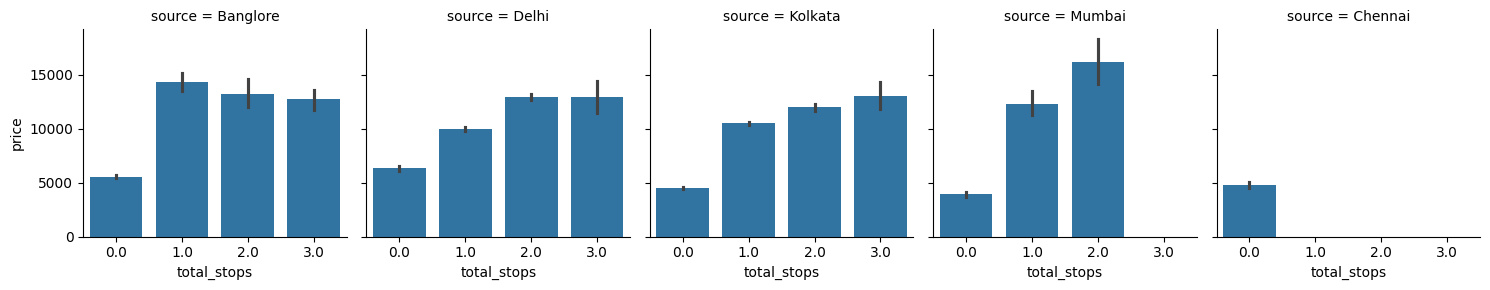

In [56]:
stops_grid = sns.FacetGrid(
    train,
    col = "source",
    sharey = True
)

stops_grid.map(sns.barplot, "total_stops","price")

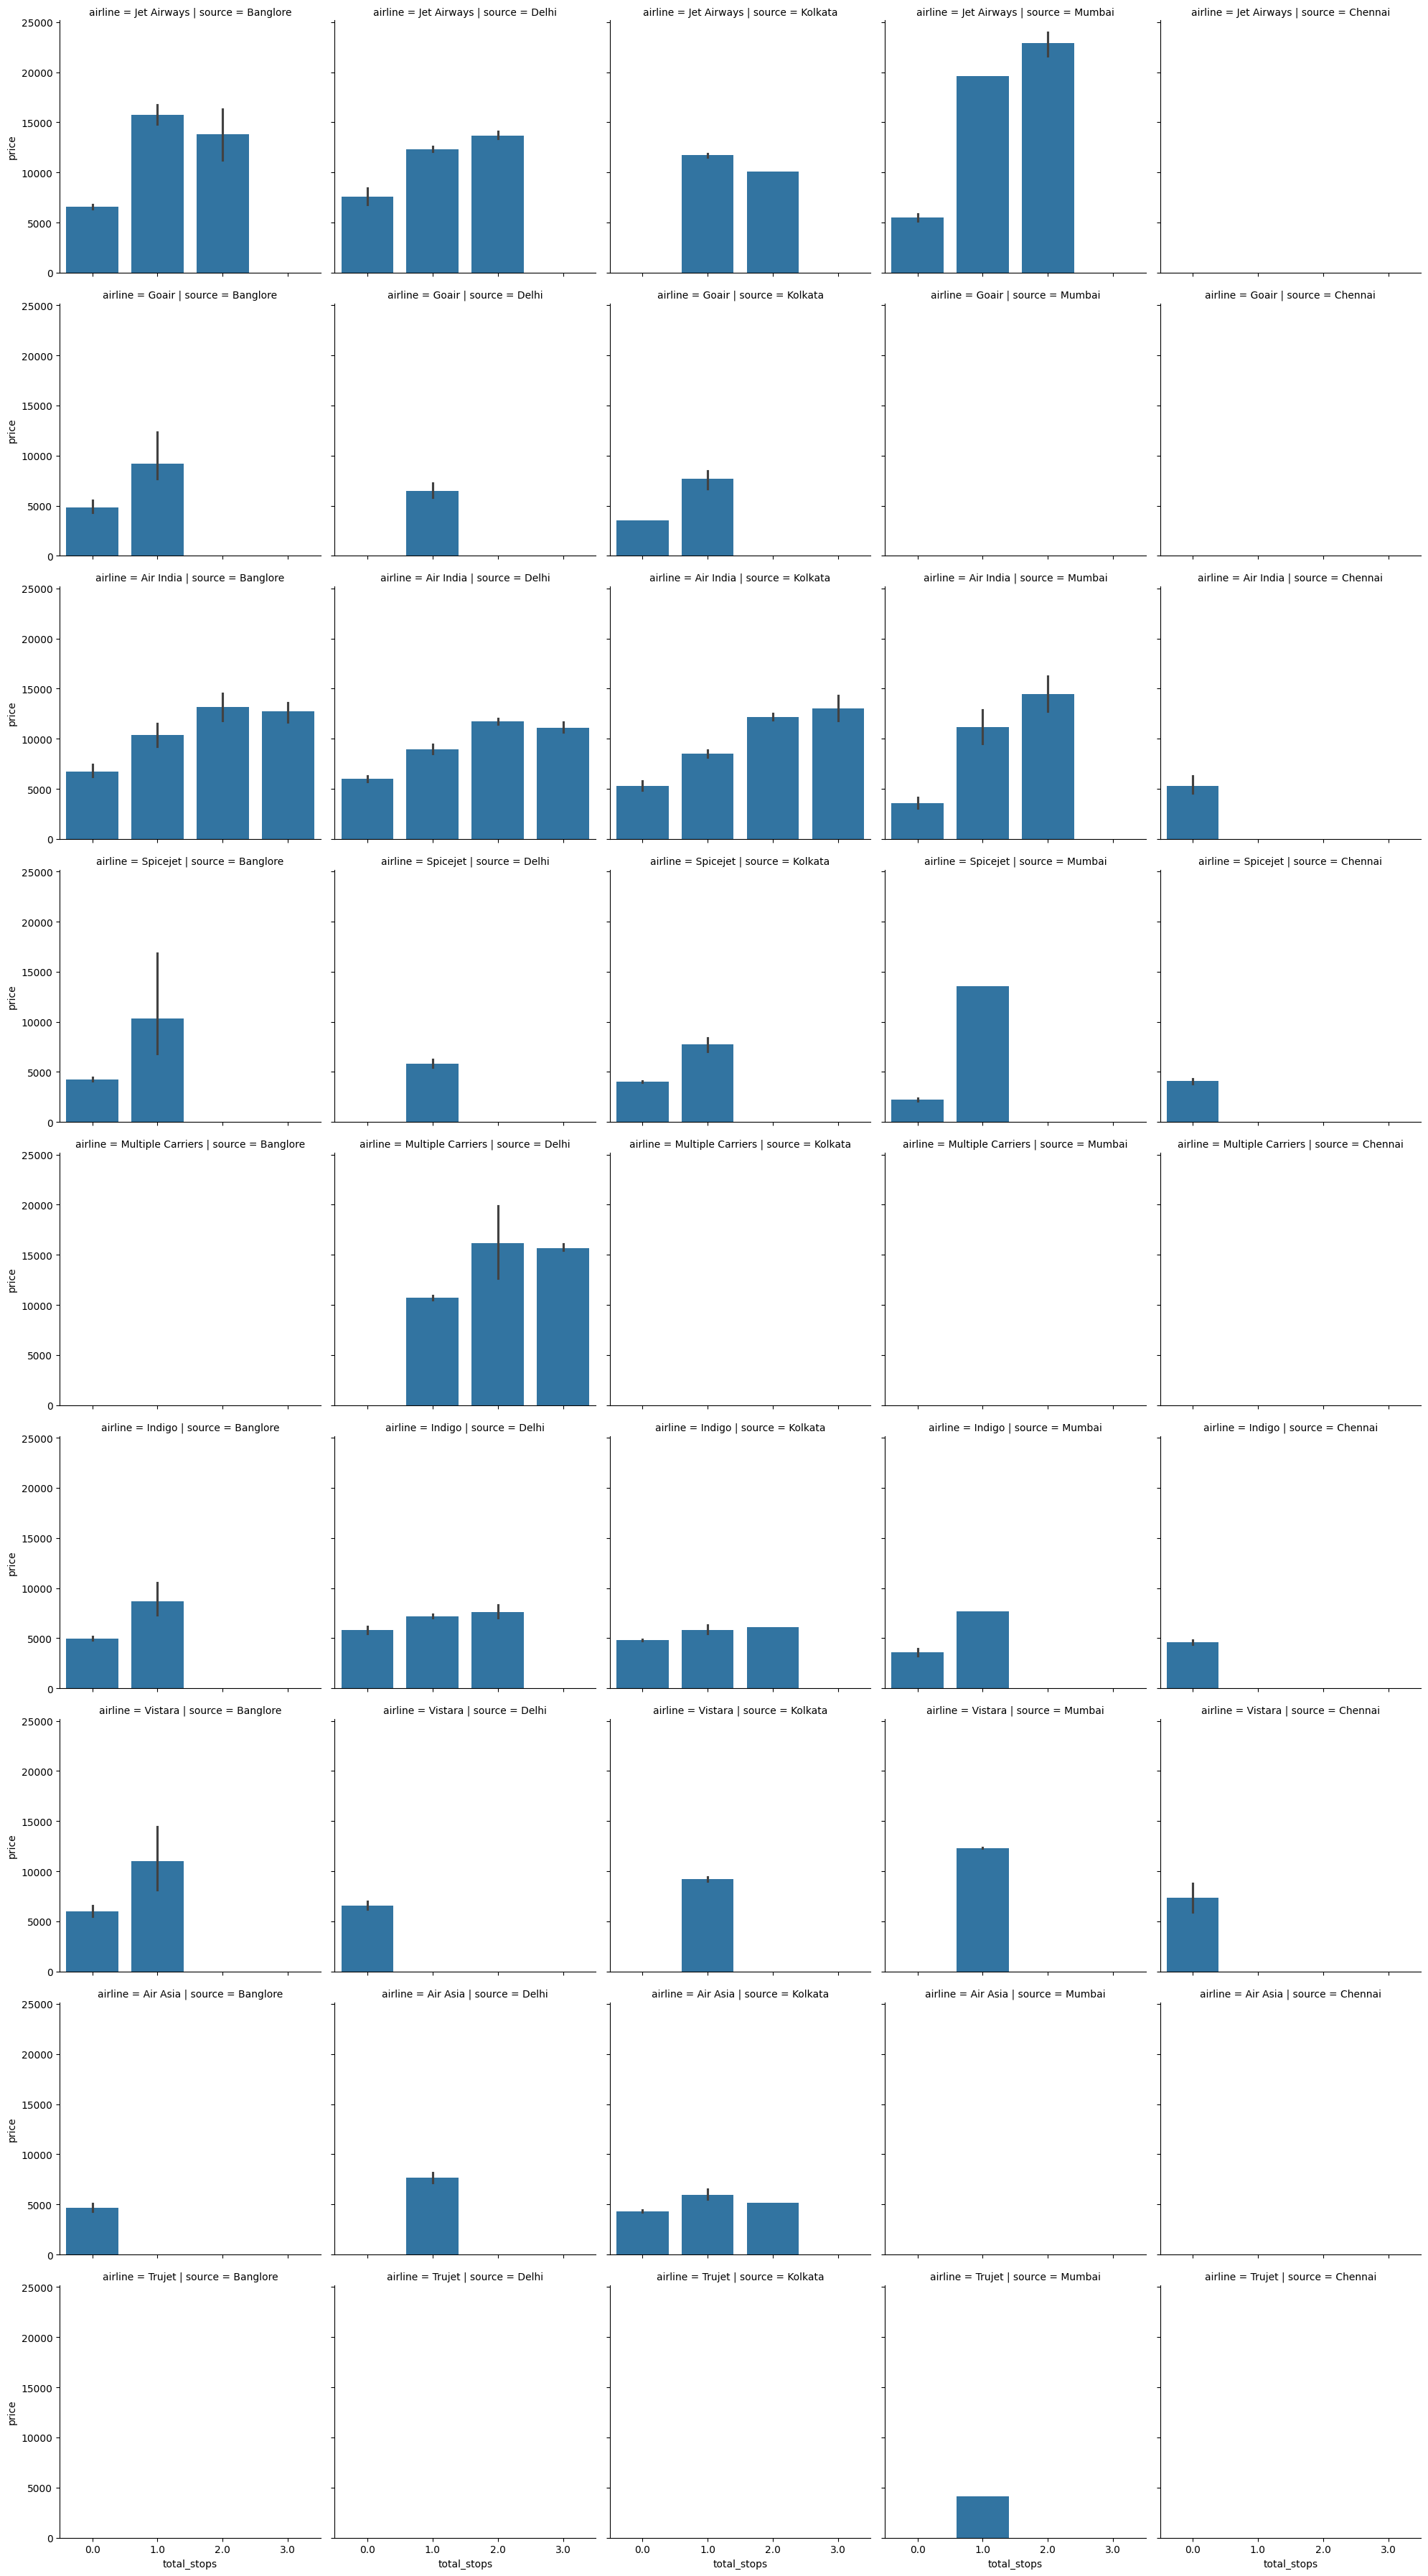

In [58]:
stops_grid = sns.FacetGrid(
    train,
    col = "source",
    row = "airline",
    height = 4,
    aspect= 1,
    sharey = True
)

stops_grid.map(sns.barplot, "total_stops","price")

### 8.6 additional_info

In [59]:
train.additional_info

0       In-flight meal not included
1       In-flight meal not included
2                           No Info
3                           No Info
4       In-flight meal not included
                   ...             
6690                        No Info
6691                        No Info
6692    In-flight meal not included
6693                        No Info
6694                 1 Long layover
Name: additional_info, Length: 6694, dtype: object

In [60]:
eda_helper_functions.cat_summary(train, "additional_info")

0       In-flight meal not included
1       In-flight meal not included
2                           No Info
3                           No Info
4       In-flight meal not included
                   ...             
6690                        No Info
6691                        No Info
6692    In-flight meal not included
6693                        No Info
6694                 1 Long layover
Name: additional_info, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 7 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,7
top,No Info
freq,5248


,count,percentage
category,,
No Info,5248,0.783986
In-flight meal not included,1215,0.181506
No check-in baggage included,207,0.030923
1 Long layover,16,0.002390
Change airports,5,0.000747
Business class,2,0.000299
Red-eye flight,1,0.000149


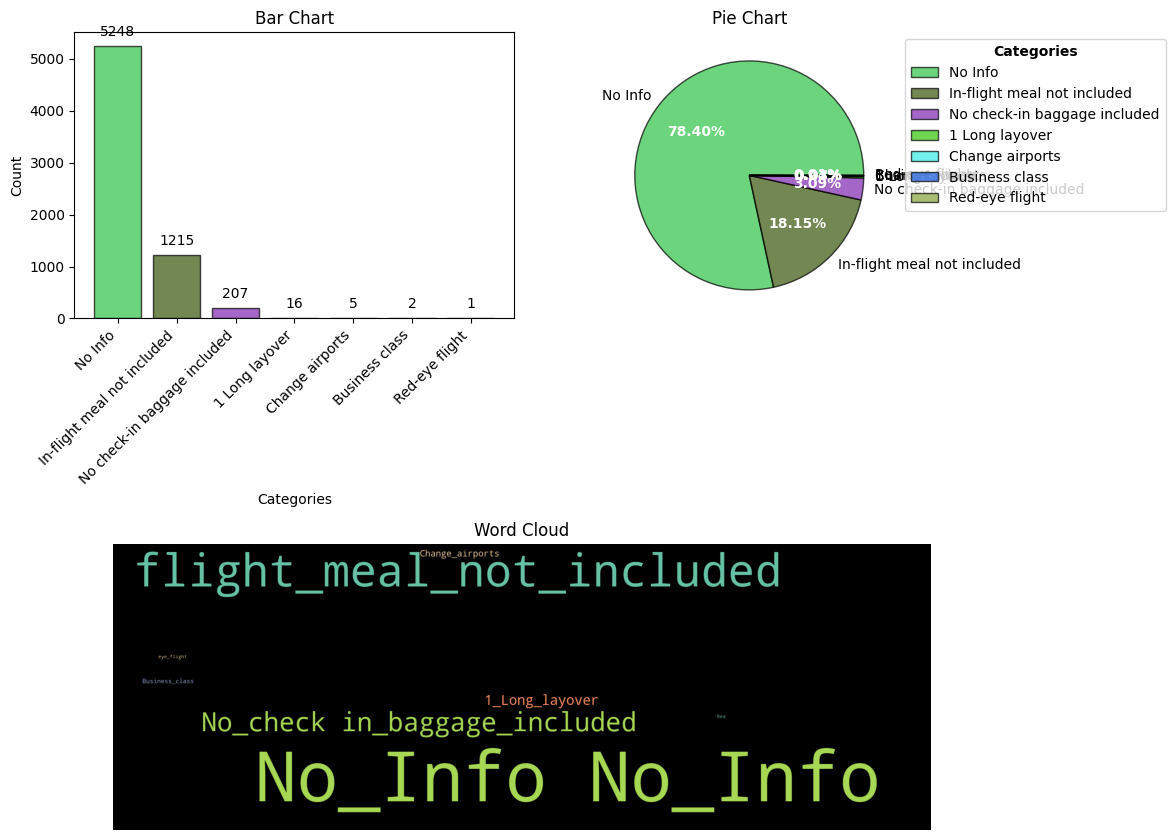

In [65]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

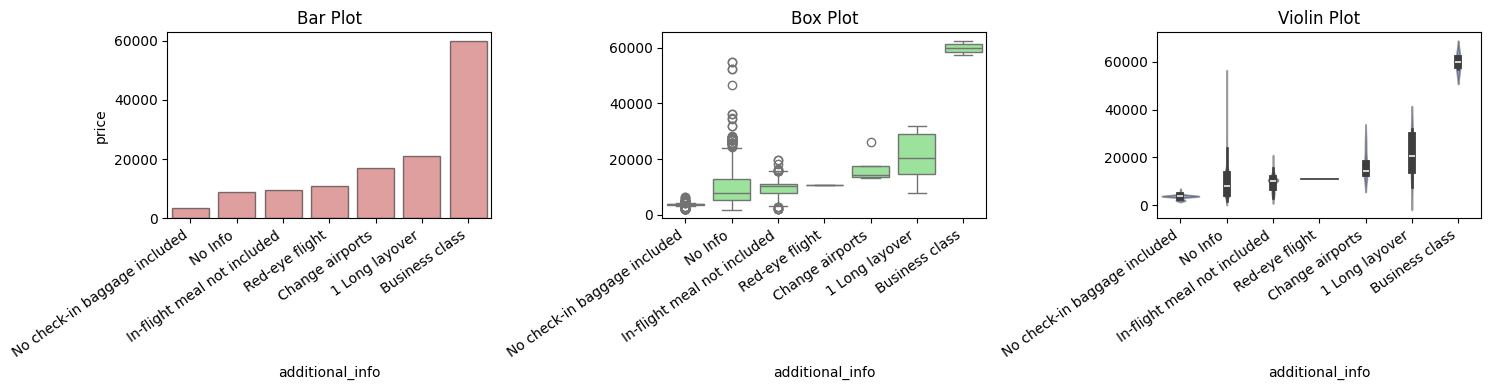

In [66]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

In [67]:
pip install ydata-profiling

ERROR: Could not find a version that satisfies the requirement ydata-profiling (from versions: none)
ERROR: No matching distribution found for ydata-profiling
Note: you may need to restart the kernel to use updated packages.
